Saving train.csv to train (4).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3

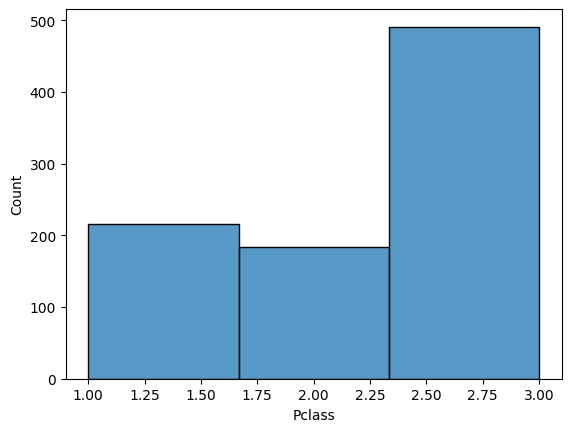

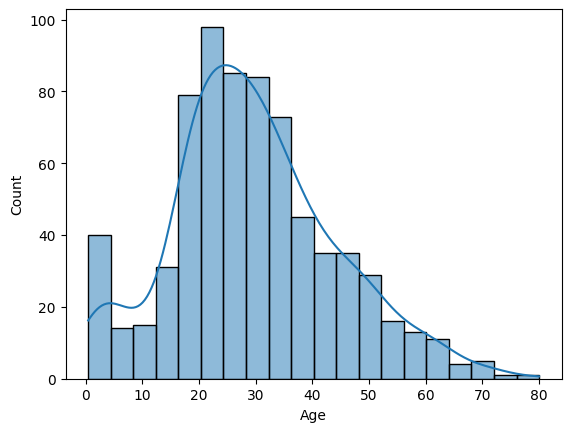

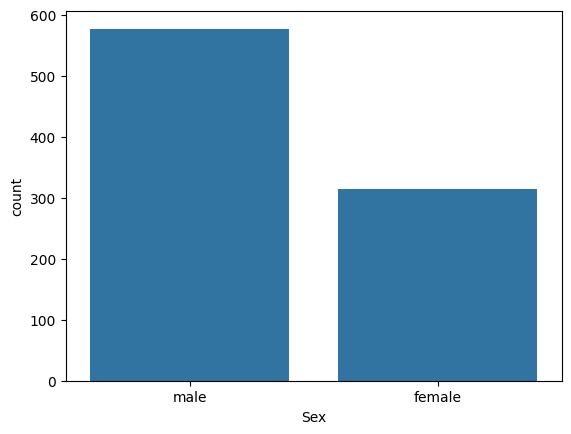

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----- k-NN Model Evaluation -----
Accuracy: 0.8015
Precision: 0.7423
Recall: 0.7200
F1 Score: 0.7310
-------------------------------------
----- Decision Tree Model Evaluation -----
Accuracy: 0.7715
Precision: 0.7097
Recall: 0.6600
F1 Score: 0.6839
-------------------------------------


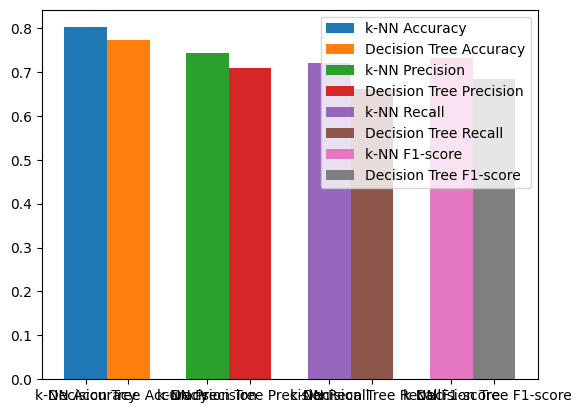

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Upload the CSV file to Google Colab
from google.colab import files
uploaded = files.upload()

# Assuming you uploaded a file named 'train.csv'
file_name = 'train.csv'

# Load the dataset
titanic_data = pd.read_csv(file_name)

# Part 1: Data Exploration and Preprocessing

# Explore the Dataset
print(titanic_data.head())

# Visualizations for key features
sns.histplot(titanic_data['Pclass'], bins=3)
plt.show()
sns.histplot(titanic_data['Age'].dropna(), kde=True)
plt.show()
sns.countplot(x='Sex', data=titanic_data)
plt.show()

# Check for missing values
print(titanic_data.isnull().sum())

#  Data Preprocessing
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.dropna(subset=['Embarked'], inplace=True)

# Encode categorical variables
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# --- Feature Engineering (Optional) ---
# Extract titles from 'Name'
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Group less common titles into 'Other'
titanic_data['Title'] = titanic_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                                 'Jonkheer', 'Dona'], 'Other')
# Create dummy variables for titles
titanic_data = pd.get_dummies(titanic_data, columns=['Title'], drop_first=True)
# --- End of Feature Engineering ---

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Fare'] + list(titanic_data.columns[titanic_data.columns.str.startswith('Title_')])
titanic_data[numerical_features] = scaler.fit_transform(titanic_data[numerical_features])

# Part 2: Implementing k-NN and Decision Trees

#  Model Training
# Drop irrelevant columns
X = titanic_data.drop(['Survived', 'Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


knn_predictions = knn.predict(X_test)
dtree_predictions = dtree.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"----- {model_name} Model Evaluation -----")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-------------------------------------")
    return accuracy, precision, recall, f1

knn_metrics = evaluate_model(y_test, knn_predictions, "k-NN")
dtree_metrics = evaluate_model(y_test, dtree_predictions, "Decision Tree")

# Part 3: Visualization (Performance only)

# 2. Performance Visualization
model_names = ['k-NN', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(model_names))  # This line is no longer necessary

for i, metric in enumerate(metrics):
    ax.bar(i - bar_width / 2, knn_metrics[i], bar_width, label=f'k-NN {metric}')
    ax.bar(i + bar_width / 2, dtree_metrics[i], bar_width, label=f'Decision Tree {metric}')

ax.set_xticks([i - bar_width / 2 for i in range(len(metrics))] + [i + bar_width / 2 for i in range(len(metrics))])  # Set tick positions for all bars
ax.set_xticklabels(['k-NN ' + metric for metric in metrics] + ['Decision Tree ' + metric for metric in metrics]) # Set labels for all bars
ax.legend()
plt.show()